### Sentiment Analysis

Using NLTK (Natural Language Tool Kit), it is possible to predict the overall sentiment of a tweet. NLTK creates a compound score for a string of text, ranging from -1 (overwhelmingly negative) to 1 (overwhelmingly positive). This exercise is useful for determining bot accounts because it will flag accounts that could be tweeting in a partisan manner.

In [1]:
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
import numpy as np
import pandas as pd

In [2]:
mrvan_df = pd.read_pickle("data/processed_data/mrvan_2.pkl")
jrg_df = pd.read_pickle("data/processed_data/jrg_2.pkl")
in_df = pd.read_pickle("data/processed_data/in_2.pkl")
nwi_df = pd.read_pickle("data/processed_data/nwi_2.pkl")

In [3]:
sia = SentimentIntensityAnalyzer()
sia.polarity_scores("Wow, NLTK is really powerful!")

{'neg': 0.0, 'neu': 0.295, 'pos': 0.705, 'compound': 0.8012}

In [4]:
mrvan_tweet_texts = mrvan_df["text"]
pos_scores = []
neu_scores = []
neg_scores = []
pos_neu_neg = []
compound_scores = []
for i in range(len(mrvan_tweet_texts)):
    tweet_text = mrvan_tweet_texts[i]

    sia = SentimentIntensityAnalyzer()
    score = sia.polarity_scores(tweet_text)
    pos_scores.append(score["pos"])
    neu_scores.append(score["neu"])
    neg_scores.append(score["neg"])
    compound_scores.append(score["compound"])

    if score["pos"] > score["neu"] and score["pos"] > score["neg"]:
        pos_neu_neg.append("pos")
    elif score["neu"] > score["pos"] and score["neu"] > score["neg"]:
        pos_neu_neg.append("neu")
    else:
        pos_neu_neg.append("neg")
    
mrvan_df["pos_score"] = pos_scores
mrvan_df["neu_score"] = neu_scores
mrvan_df["neg_score"] = neg_scores
mrvan_df["pos_neu_neg"] = pos_neu_neg
mrvan_df["compound_score"] = compound_scores

In [5]:
jrg_tweet_texts = jrg_df["text"]
pos_scores = []
neu_scores = []
neg_scores = []
pos_neu_neg = []
compound_scores = []
for i in range(len(jrg_tweet_texts)):
    tweet_text = jrg_tweet_texts[i]

    sia = SentimentIntensityAnalyzer()
    score = sia.polarity_scores(tweet_text)
    pos_scores.append(score["pos"])
    neu_scores.append(score["neu"])
    neg_scores.append(score["neg"])
    compound_scores.append(score["compound"])

    if score["pos"] > score["neu"] and score["pos"] > score["neg"]:
        pos_neu_neg.append("pos")
    elif score["neu"] > score["pos"] and score["neu"] > score["neg"]:
        pos_neu_neg.append("neu")
    else:
        pos_neu_neg.append("neg")
    
jrg_df["pos_score"] = pos_scores
jrg_df["neu_score"] = neu_scores
jrg_df["neg_score"] = neg_scores
jrg_df["pos_neu_neg"] = pos_neu_neg
jrg_df["compound_score"] = compound_scores

In [6]:
in_tweet_texts = in_df["text"]
pos_scores = []
neu_scores = []
neg_scores = []
pos_neu_neg = []
compound_scores = []
for i in range(len(in_tweet_texts)):
    tweet_text = in_tweet_texts[i]

    sia = SentimentIntensityAnalyzer()
    score = sia.polarity_scores(tweet_text)
    pos_scores.append(score["pos"])
    neu_scores.append(score["neu"])
    neg_scores.append(score["neg"])
    compound_scores.append(score["compound"])

    if score["pos"] > score["neu"] and score["pos"] > score["neg"]:
        pos_neu_neg.append("pos")
    elif score["neu"] > score["pos"] and score["neu"] > score["neg"]:
        pos_neu_neg.append("neu")
    else:
        pos_neu_neg.append("neg")
    
in_df["pos_score"] = pos_scores
in_df["neu_score"] = neu_scores
in_df["neg_score"] = neg_scores
in_df["pos_neu_neg"] = pos_neu_neg
in_df["compound_score"] = compound_scores

In [7]:
nwi_tweet_texts = nwi_df["text"]
pos_scores = []
neu_scores = []
neg_scores = []
pos_neu_neg = []
compound_scores = []
for i in range(len(nwi_tweet_texts)):
    tweet_text = nwi_tweet_texts[i]

    sia = SentimentIntensityAnalyzer()
    score = sia.polarity_scores(tweet_text)
    pos_scores.append(score["pos"])
    neu_scores.append(score["neu"])
    neg_scores.append(score["neg"])
    compound_scores.append(score["compound"])

    if score["pos"] > score["neu"] and score["pos"] > score["neg"]:
        pos_neu_neg.append("pos")
    elif score["neu"] > score["pos"] and score["neu"] > score["neg"]:
        pos_neu_neg.append("neu")
    else:
        pos_neu_neg.append("neg")
    
nwi_df["pos_score"] = pos_scores
nwi_df["neu_score"] = neu_scores
nwi_df["neg_score"] = neg_scores
nwi_df["pos_neu_neg"] = pos_neu_neg
nwi_df["compound_score"] = compound_scores

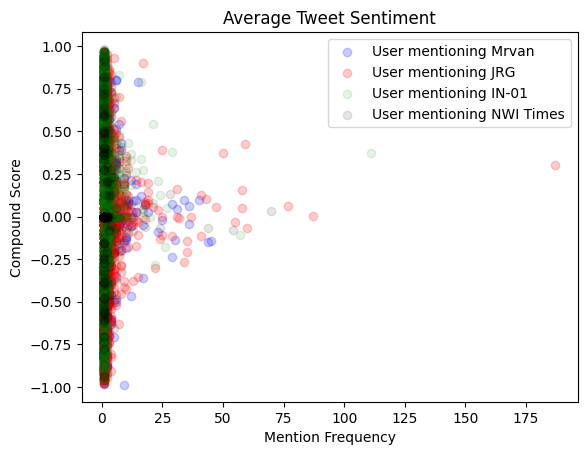

In [12]:
mrvan_avg_comp_scores = []
for account in mrvan_df["author_id"].value_counts().keys():
    scores = mrvan_df.loc[mrvan_df['author_id'] == account]["compound_score"]
    avg = np.average(scores)
    mrvan_avg_comp_scores.append(avg)
jrg_avg_comp_scores = []
for account in jrg_df["author_id"].value_counts().keys():
    scores = jrg_df.loc[jrg_df['author_id'] == account]["compound_score"]
    avg = np.average(scores)
    jrg_avg_comp_scores.append(avg)
in_avg_comp_scores = []
for account in in_df["author_id"].value_counts().keys():
    scores = in_df.loc[in_df['author_id'] == account]["compound_score"]
    avg = np.average(scores)
    in_avg_comp_scores.append(avg)
nwi_avg_comp_scores = []
for account in nwi_df["author_id"].value_counts().keys():
    scores = nwi_df.loc[nwi_df['author_id'] == account]["compound_score"]
    avg = np.average(scores)
    nwi_avg_comp_scores.append(avg)

plt.scatter(mrvan_df["author_id"].value_counts(), mrvan_avg_comp_scores, alpha=0.2, color="blue", label="User mentioning Mrvan")
plt.scatter(jrg_df["author_id"].value_counts(), jrg_avg_comp_scores, alpha=0.2, color="red", label="User mentioning JRG")
plt.scatter(in_df["author_id"].value_counts(), in_avg_comp_scores, alpha=0.1, color="green", label="User mentioning IN-01")
plt.scatter(nwi_df["author_id"].value_counts(), nwi_avg_comp_scores, alpha=0.1, color="black", label="User mentioning NWI Times")
plt.xlabel("Mention Frequency")
plt.ylabel("Compound Score")
plt.title("Average Tweet Sentiment")
plt.legend()

In [13]:
mrvan_df.to_pickle("data/processed_data/mrvan_3.pkl")
jrg_df.to_pickle("data/processed_data/jrg_3.pkl")
in_df.to_pickle("data/processed_data/in_3.pkl")
nwi_df.to_pickle("data/processed_data/nwi_3.pkl")